In [1]:
"""
@author: Keerthi Bojja, siddhartha Kille
"""
import pandas as pd
import numpy as np


reviews = pd.read_csv('./review_data.csv')
reviews = reviews.drop(columns=['review_id', 'bank_id', 'user_id', 'date_posted'], axis=0)
reviews.head()

,Unnamed: 0,summary,bank_name,rating,review
0,0,Bad Credit Union With Awful Customer Service!!,Georgia's Own Credit Union,1,Opened an account with Georgia's Own Credit Un...
1,1,Bunch Of Immoral Thieves,Georgia's Own Credit Union,1,Stay away from these thieves at all costs. The...
2,2,Georgia's Own Credit Union,Georgia's Own Credit Union,2,I joined Georgia's Own Credit Union about 20 y...
3,3,Many years of excellent service!,Georgia's Own Credit Union,5,I begin my relationship with Georgia's Own Cre...
4,4,A great local credit union,Georgia's Own Credit Union,4,Georgia's Own Credit Union is a local credit u...


In [2]:
reviews.groupby('bank_name', as_index=False).review.count()

,bank_name,review
0,Ally Bank,703
1,American Express National Bank,261
2,Associated Credit Union,5
3,Bank of America,343
4,CIT Bank,296
5,Capital One,411
6,Chase Bank,220
7,Citi,129
8,Delta Community Credit Union,26
9,Georgia Banking Company,8


In [3]:
final_reviews = reviews[reviews['bank_name']=='Ally Bank']
final_reviews.reset_index(inplace=True)
final_reviews = final_reviews.drop(columns=['index'], axis=0)
# final_reviews.loc[378,:]

In [4]:
#change any int/float to str
final_reviews['review']= final_reviews['review'].apply(str)

# Convert the reviews to lowercase
final_reviews['review']= final_reviews['review'].map(lambda x: x.lower())

In [5]:
# !pip install -U gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
import re
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

In [7]:
# from gensim.parsing.preprocessing import strip_punctuation
# strip_punctuation(final_reviews['review'])

# # from gensim.parsing.preprocessing import remove_stopwords

# # remove_stopwords(final_reviews['review'])


In [8]:
# #lemmatize — words in third person are changed to first person and verbs in past and future tenses are changed into present
# from nltk import PorterStemmer
# stemmer = PorterStemmer()
# def lemmatize_stemming(text):
#     return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# #Stemming - words are reduced to their root form
# def preprocess(text):
#     result = []
#     for token in gensim.utils.simple_preprocess(text):
#         if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
#             result.append(lemmatize_stemming(token))
#     return result

In [9]:
def preprocess(text):
   # split into words
    text = word_tokenize(text)
    # convert to lower case
    text= [w.lower() for w in text]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    text = [w.translate(table) for w in text]
    # remove remaining tokens that are not alphabetic
    text = [word for word in text if word.isalpha()]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # ....
#     # stemming of words
#     porter = PorterStemmer()
#     text = [porter.stem(word) for word in text]
    
    # join all
    text = " ".join(text)
    return(text)

In [10]:
#Checking with sample review
doc_sample = final_reviews.loc[500,'review']
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['i', 'opened', 'a', 'checking', 'account', 'with', 'ally', 'after', 'my', 'regular', 'walk-in', 'bank', 'started', 'bsing', 'me', 'around', 'with', 'fees.', 'the', 'fees', 'at', 'ally', 'are', 'reasonable', 'and', 'fair.', 'customer', 'service', 'has', 'always', 'been', 'there', 'for', 'me,', 'regardless', 'of', 'the', 'problem.']


 tokenized and lemmatized document: 
opened checking account ally regular walkin bank started bsing around fees fees ally reasonable fair customer service always regardless problem


In [11]:
#Apply to all reviews
final_reviews['reviews_processed'] = pd.DataFrame(final_reviews['review'].map(preprocess))
# final_reviews.head(5)
type(final_reviews['reviews_processed'])
(final_reviews['reviews_processed']).str.split()

0      [advised, ally, bank, accept, money, orders, i...
1      [zelle, payment, payments, placed, hold, requi...
2      [every, single, transaction, attempted, ally, ...
3      [deal, ira, department, moved, ira, sep, ally,...
4      [ally, plus, years, least, different, cd, reg,...
5      [chronology, ordered, checks, existing, checki...
6      [attempted, open, simple, checking, account, p...
7      [asked, one, cds, moved, month, month, big, re...
8      [customer, bank, yrs, six, months, ago, receiv...
9      [ally, years, customer, service, used, really,...
10     [advertise, cds, never, allow, transfer, money...
11     [long, term, customer, ally, bank, recently, n...
12     [original, review, br, ally, customer, years, ...
13     [another, post, said, chased, rates, online, y...
14     [ally, bank, since, october, far, really, impr...
15     [cd, ally, bank, got, good, return, tried, get...
16     [opened, cd, got, information, incorrect, long...
17     [takes, way, long, proce

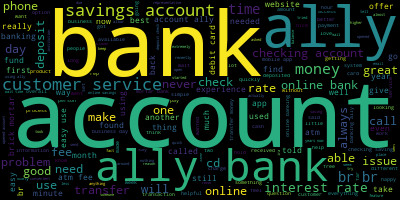

In [12]:
#Word cloud -- visual representation of most common words
#!pip install wordcloud
from wordcloud import WordCloud
long_string = ','.join(list(final_reviews['review'].values))
wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

# Bag of Words

In [13]:

dictionary = gensim.corpora.Dictionary((final_reviews['reviews_processed']).str.split())
del_ids = [k for k,v in dictionary.items() if (v=='nt' or v=='br')]
dictionary.filter_tokens(bad_ids=del_ids)
# count = 0
# for k, v in dictionary.iteritems():
#     print(k, v)
#     count += 1
#     if count > 10:
#         break

In [14]:
#Filter out tokens that appear in
    #less than 15 documents (absolute number) or
    #more than 0.5 documents (fraction of total corpus size, not absolute number).
    #after the above two steps, keep only the first 100000 most frequent tokens.

dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [15]:
bow_corpus = [dictionary.doc2bow(doc) for doc in (final_reviews['reviews_processed'].str.split())]
bow_corpus[500]

[(59, 1),
 (72, 2),
 (118, 1),
 (130, 1),
 (182, 1),
 (342, 1),
 (358, 1),
 (373, 1),
 (386, 1)]

# Running LDA model

In [22]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=20, workers=2)
# lda_model = gensim.models.ldamodel.LdaModel(bow_corpus, num_topics=10, id2word=dictionary, passes=20, per_word_topics=True)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.023*"money" + 0.020*"check" + 0.015*"would" + 0.015*"get" + 0.015*"time" + 0.014*"deposit" + 0.014*"days" + 0.014*"told" + 0.013*"call" + 0.011*"phone"
Topic: 1 
Words: 0.040*"fees" + 0.032*"atm" + 0.029*"online" + 0.021*"checking" + 0.020*"banks" + 0.020*"also" + 0.018*"fee" + 0.017*"banking" + 0.016*"great" + 0.015*"use"
Topic: 2 
Words: 0.029*"interest" + 0.025*"time" + 0.024*"savings" + 0.020*"rates" + 0.020*"also" + 0.018*"accounts" + 0.015*"rate" + 0.015*"wait" + 0.015*"money" + 0.015*"online"
Topic: 3 
Words: 0.029*"accounts" + 0.025*"savings" + 0.024*"easy" + 0.023*"banking" + 0.020*"online" + 0.017*"use" + 0.017*"credit" + 0.016*"would" + 0.016*"one" + 0.014*"website"
Topic: 4 
Words: 0.030*"accounts" + 0.029*"never" + 0.028*"call" + 0.028*"problem" + 0.021*"savings" + 0.018*"said" + 0.017*"back" + 0.016*"phone" + 0.015*"years" + 0.014*"rates"
Topic: 5 
Words: 0.035*"savings" + 0.024*"checking" + 0.019*"use" + 0.016*"one" + 0.016*"interest" + 0.015*"fees" + 

# Performance evaluation

In [60]:
#Different words actually present in review number 2000
final_reviews.loc[298, 'review']

"ally bank is the best bank i ever dealt with. the reason for choosing ally bank is that they have atm reimbursement. i travel a lot, and with my previous bank, i incurred lots of fees ranging from 2 to $5. i also enjoy the fact that they give a better than average percentage rate for checking and cd accounts. i have both checking and savings along with a cd account. the people of ally are very friendly, knowledgeable, and address any issues i may have. deposits are easy, and online transactions in most cases, are available within 24 hours. the mobile app makes depositing checks easy and convenient, and the mobile app is easy to navigate. you can't ask for much more from a banking institution."

In [69]:
#How well the model identifies weightage of each word in a particular review/topic
from operator import itemgetter
# max(lis,key=itemgetter(1))[0]
print(lda_model.get_document_topics(bow_corpus[298]))
for index, score in sorted(lda_model[bow_corpus[501]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 7)))

[(3, 0.20954058), (5, 0.37507412), (9, 0.40165544)]

Score: 0.5842095613479614	 
Topic: 0.045*"money" + 0.041*"savings" + 0.024*"online" + 0.020*"interest" + 0.017*"transfer" + 0.015*"checking" + 0.015*"would"

Score: 0.17596307396888733	 
Topic: 0.040*"fees" + 0.032*"atm" + 0.029*"online" + 0.021*"checking" + 0.020*"banks" + 0.020*"also" + 0.018*"fee"

Score: 0.12129911780357361	 
Topic: 0.084*"cd" + 0.032*"transfer" + 0.030*"rate" + 0.025*"cds" + 0.019*"days" + 0.018*"ira" + 0.018*"email"

Score: 0.1008751392364502	 
Topic: 0.029*"accounts" + 0.025*"savings" + 0.024*"easy" + 0.023*"banking" + 0.020*"online" + 0.017*"use" + 0.017*"credit"


In [70]:
topic_dict = {0: 'Check Deposit Time', 1: 'Fees', 2: 'Wait Time', 3: 'Online Banking', 4: 'Customer Service Representative', 
              6: 'Customer Service Representative', 5: 'Interest Rates', 7: 'Online Transfers', 8: 'IRA, CD', 9: 'Mobile App'} 
topics_assigned_dict = {}
topic_name = []
topic_num = []
for idx in final_reviews.index:
    topic_n = max(lda_model.get_document_topics(bow_corpus[idx]), key=itemgetter(1))[0]
    topic_num.append(topic_n)
#     print(idx, topic_n)
    topic_name.append(topic_dict[topic_n])
final_reviews['Topic_Num'] = topic_num
final_reviews['Topic_Name'] = topic_name
review_topics_df = final_reviews[['review', 'Topic_Num', 'Topic_Name']]
# review_topics_df.loc[298,['review', 'Topic_Name']]
review_topics_df.head(10)

,review,Topic_Num,Topic_Name
0,be advised ally bank does not accept any money...,0,Check Deposit Time
1,"zelle payment - payments placed on hold, requi...",4,Customer Service Representative
2,every single transaction i have attempted at a...,8,"IRA, CD"
3,do not deal with their ira department. i moved...,2,Wait Time
4,been with ally 7 plus years. have had at least...,2,Wait Time
5,here's a chronology when i ordered checks for ...,0,Check Deposit Time
6,attempted to open a simple checking account. i...,2,Wait Time
7,i asked for one of my cds to be moved to an 18...,8,"IRA, CD"
8,i had been customer with this bank for 4-5 yrs...,0,Check Deposit Time
9,i have been with ally for over 6 years. their ...,2,Wait Time


# Perplexity and Coherence score

In [25]:
texts = final_reviews['reviews_processed'].str.split()
id2word = gensim.corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]

#Compute Perplexity -- the lower the better
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))

from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.975052666957887

Coherence Score:  0.41584814838948053


# Visualize the topics-keywords

In [26]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.087015 -0.036189       1        1  20.057350
7     -0.037903  0.033323       2        1  16.927376
1     -0.127436  0.007546       3        1  16.347174
2     -0.039987 -0.005095       4        1  11.752308
9     -0.139829 -0.007893       5        1   9.278453
3     -0.085804 -0.012059       6        1   7.427053
5     -0.097337  0.055724       7        1   7.092532
8      0.194134  0.169951       8        1   4.348624
6      0.116874 -0.164802       9        1   3.557060
4      0.130274 -0.040505      10        1   3.212066, topic_info=    Category        Freq      Term       Total  loglift  logprob
65   Default  187.000000        cd  187.000000  30.0000  30.0000
211  Default  205.000000       app  205.000000  29.0000  29.0000
209  Default  627.000000   savings  627.000000  28.0000  28.0000
57   Default  371.000000  accounts  371.000000  27.0000  27.0000
6    Default  201.000000      call  201.000000  26.0000  26.0000
393  Default  226.000000       atm  226.000000  25.0000  25.0000
48   Default  215.000000  transfer  215.000000  24.0000  24.0000
23   Default  140.000000    called  140.000000  23.0000  23.0000
72   Default  366.000000      fees  366.000000  22.0000  22.0000
242  Default  240.000000      rate  240.000000  21.0000  21.0000
373  Default  119.000000   problem  119.000000  20.0000  20.0000
0    Default  282.000000   deposit  282.000000  19.0000  19.0000
108  Default  306.000000     rates  306.000000  18.0000  18.0000
36   Default  204.000000     never  204.000000  17.0000  17.0000
214  Default  306.000000      easy  306.000000  16.0000  16.0000
68   Default  199.000000      days  199.000000  15.0000  15.0000
286  Default  144.000000      back  144.000000  14.0000  14.0000
308  Default   60.000000       rep   60.000000  13.0000  13.0000
357  Default  137.000000    mobile  137.000000  12.0000  12.0000
206  Default  442.000000  interest  442.000000  11.0000  11.0000
153  Default   75.000000       cds   75.000000  10.0000  10.0000
118  Default  354.000000  checking  354.000000   9.0000   9.0000
27   Default  200.000000     could  200.000000   8.0000   8.0000
235  Default  286.000000   banking  286.000000   7.0000   7.0000
43   Default   81.000000      said   81.000000   6.0000   6.0000
117  Default  218.000000     check  218.000000   5.0000   5.0000
51   Default  339.000000       use  339.000000   4.0000   4.0000
58   Default  308.000000      also  308.000000   3.0000   3.0000
74   Default  281.000000       get  281.000000   2.0000   2.0000
188  Default  163.000000      good  163.000000   1.0000   1.0000
..       ...         ...       ...         ...      ...      ...
515  Topic10    3.076328     error   18.678396   1.6346  -5.8271
422  Topic10    4.185492  whenever   25.893358   1.6159  -5.5192
274  Topic10    6.540621  products   40.812222   1.6073  -5.0728
354  Topic10    4.543932    either   28.477257   1.6029  -5.4370
12   Topic10    8.008430   payment   51.347733   1.5801  -4.8703
449  Topic10    3.560716     bills   23.002779   1.5726  -5.6809
355  Topic10    3.471435      fund   22.714308   1.5598  -5.7063
249  Topic10    3.298331       ach   21.589993   1.5594  -5.7574
385  Topic10    5.250162      paid   34.430321   1.5576  -5.2926
36   Topic10   30.759649     never  204.201904   1.5454  -3.5246
6    Topic10   29.398315      call  201.379456   1.5140  -3.5699
230  Topic10    6.048391    trying   40.334122   1.5409  -5.1510
286  Topic10   17.637766      back  144.606354   1.3343  -4.0808
172  Topic10   10.898995       got   85.586937   1.3774  -4.5622
7    Topic10    9.714778      hold   76.567459   1.3737  -4.6772
57   Topic10   31.237906  accounts  371.422913   0.9625  -3.5092
62   Topic10   11.721961  business  121.012054   1.1038  -4.4894
14   Topic10   16.322535     phone  206.440063   0.9008  -4.1583
55   Topic10   16.097267     years  210.497070   0.8674  -4

In [27]:
import pickle
Bank_Reviews = 'lda_model.sav'
pickle.dump(lda_model, open(Bank_Reviews, 'wb'))

# SKLearn LDA

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ( "Topic %d:" % (topic_idx) )
        print (" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))


documents = final_reviews['reviews_processed'].apply(str)

no_features = 500

# NMF is able to use tf-idf
# tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
# tfidf = tfidf_vectorizer.fit_transform(documents)
# tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 10

# Run NMF
# nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)a

# Run LDA
lda = LatentDirichletAllocation(no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
# display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
br account ally bank nt called money service told customer
Topic 1:
wire order ally funds checks payment br received transfer nt
Topic 2:
easily account pleased used opened accounts got email different problems
Topic 3:
account bank ally savings online money service customer rates checking
Topic 4:
hold required phone minute payment multiple payments security questions br
Topic 5:
cd rate bank ally cds good offered account years rates
Topic 6:
br update ira money process help account going nt ca
Topic 7:
cds lost mail quickly wanted checks correct institutions consider request
Topic 8:
ally bank account fees nt atm money customer service use
Topic 9:
check ally days deposit money business account told bank br


In [35]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.090853  0.034799       1        1  40.915192
8      0.050533  0.033218       2        1  32.211393
0     -0.029400  0.093922       3        1  17.960097
9     -0.076713  0.166360       4        1   4.191654
5      0.209639  0.003176       5        1   2.719246
1     -0.124377  0.006909       6        1   1.045592
7     -0.041459 -0.112745       7        1   0.274577
2     -0.002439 -0.068051       8        1   0.246404
4     -0.040949 -0.078349       9        1   0.231525
6     -0.035688 -0.079239      10        1   0.204321, topic_info=    Category         Freq        Term        Total  loglift  logprob
19   Default  1607.000000        ally  1607.000000  30.0000  30.0000
54   Default   768.000000          br   768.000000  29.0000  29.0000
43   Default  1413.000000        bank  1413.000000  28.0000  28.0000
347  Default   245.000000        rate   245.000000  27.0000  27.0000
70   Default   211.000000          cd   211.000000  26.0000  26.0000
5    Default  1357.000000     account  1357.000000  25.0000  25.0000
80   Default   216.000000       check   216.000000  24.0000  24.0000
82   Default   161.000000      checks   161.000000  23.0000  23.0000
291  Default   510.000000          nt   510.000000  22.0000  22.0000
451  Default   225.000000    transfer   225.000000  21.0000  21.0000
115  Default   206.000000        days   206.000000  20.0000  20.0000
122  Default   277.000000     deposit   277.000000  19.0000  19.0000
299  Default   536.000000      online   536.000000  18.0000  18.0000
274  Default   616.000000       money   616.000000  17.0000  17.0000
348  Default   307.000000       rates   307.000000  16.0000  16.0000
389  Default   613.000000     savings   613.000000  15.0000  15.0000
6    Default   368.000000    accounts   368.000000  14.0000  14.0000
172  Default   109.000000       funds   109.000000  13.0000  13.0000
181  Default   166.000000        good   166.000000  12.0000  12.0000
400  Default   542.000000     service   542.000000  11.0000  11.0000
322  Default   201.000000       phone   201.000000  10.0000  10.0000
111  Default   529.000000    customer   529.000000   9.0000   9.0000
497  Default   201.000000       years   201.000000   8.0000   8.0000
71   Default    82.000000         cds    82.000000   7.0000   7.0000
301  Default   147.000000      opened   147.000000   6.0000   6.0000
466  Default   112.000000        used   112.000000   5.0000   5.0000
33   Default   218.000000         atm   218.000000   4.0000   4.0000
45   Default   280.000000     banking   280.000000   3.0000   3.0000
198  Default    73.000000        hold    73.000000   2.0000   2.0000
446  Default   126.000000        told   126.000000   1.0000   1.0000
..       ...          ...         ...          ...      ...      ...
54   Topic10     0.360122          br   768.371621  -1.4724  -5.2450
411  Topic10     0.162184        site    31.714758   0.9174  -6.0428
393  Topic10     0.158836      secure    29.430852   0.9713  -6.0636
61   Topic10     0.149644     calling    22.947911   1.1605  -6.1232
426  Topic10     0.143441  supervisor    19.296657   1.2915  -6.1656
424  Topic10     0.142169        stop    18.589336   1.3199  -6.1745
191  Topic10     0.179688        help    61.258962   0.3616  -5.9403
458  Topic10     0.151974       trust    26.188713   1.0439  -6.1078
485  Topic10     0.165129    withdraw    40.759618   0.6845  -6.0248
59   Topic10     0.175794          ca    60.249144   0.3563  -5.9622
338  Topic10     0.187626     process    94.349983  -0.0271  -5.8970
180  Topic10     0.176482       going    68.379072   0.2336  -5.9583
124  Topic10     0.157472  depositing    35.581094   0.7729  -6.0722
126  Topic10     0.163237   different    51.017922   0.4485  -6.0363
385  Topic10     0.170697        said    88.214578  -0.0544  -5.9916
420  Topic10     0.155667       start    37.754307   0.7021  -6.08